Load ASTSA package:

In [1]:
library(astsa)

#### ex. 2.01 - Estimating a Linear Trend


Call:
lm(formula = gtemp ~ time(gtemp))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.31946 -0.09722  0.00084  0.08245  0.29383 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.120e+01  5.689e-01  -19.69   <2e-16 ***
time(gtemp)  5.749e-03  2.925e-04   19.65   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1251 on 128 degrees of freedom
Multiple R-squared:  0.7511,	Adjusted R-squared:  0.7492 
F-statistic: 386.3 on 1 and 128 DF,  p-value: < 2.2e-16


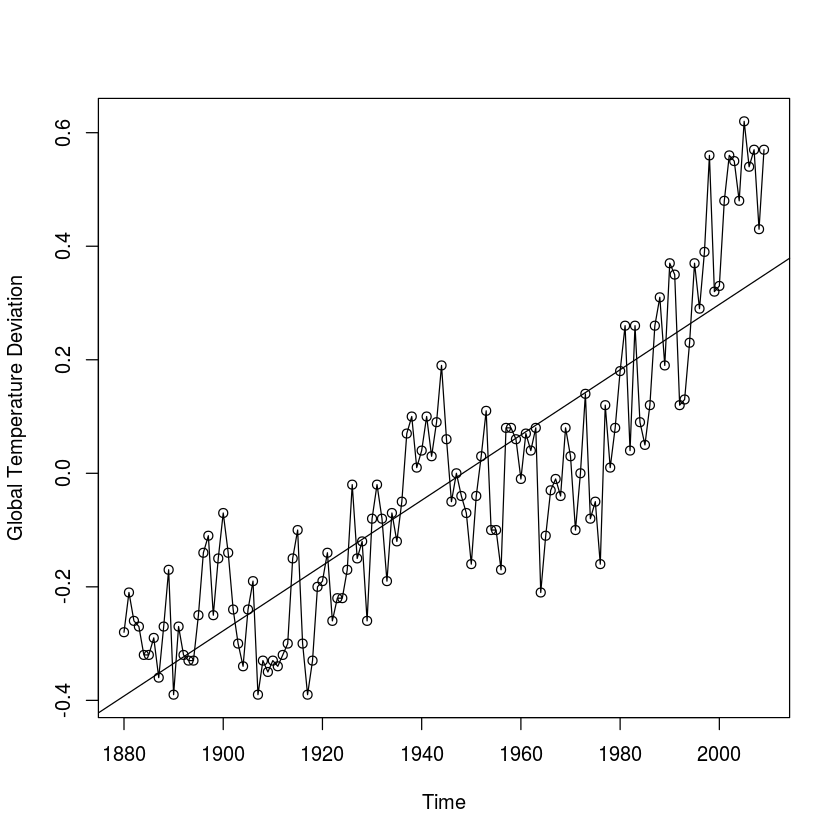

In [6]:
# perform regression with gtemp as the resopnse variable and time as the feature variable
summary(fit <- lm(gtemp ~ time(gtemp)))

# plot temperature as a function of time
plot(gtemp, type = "o", ylab = "Global Temperature Deviation")

# add regression fit
abline(fit)

#### ex. 2.02 - Pollution, Temperature and Mortality

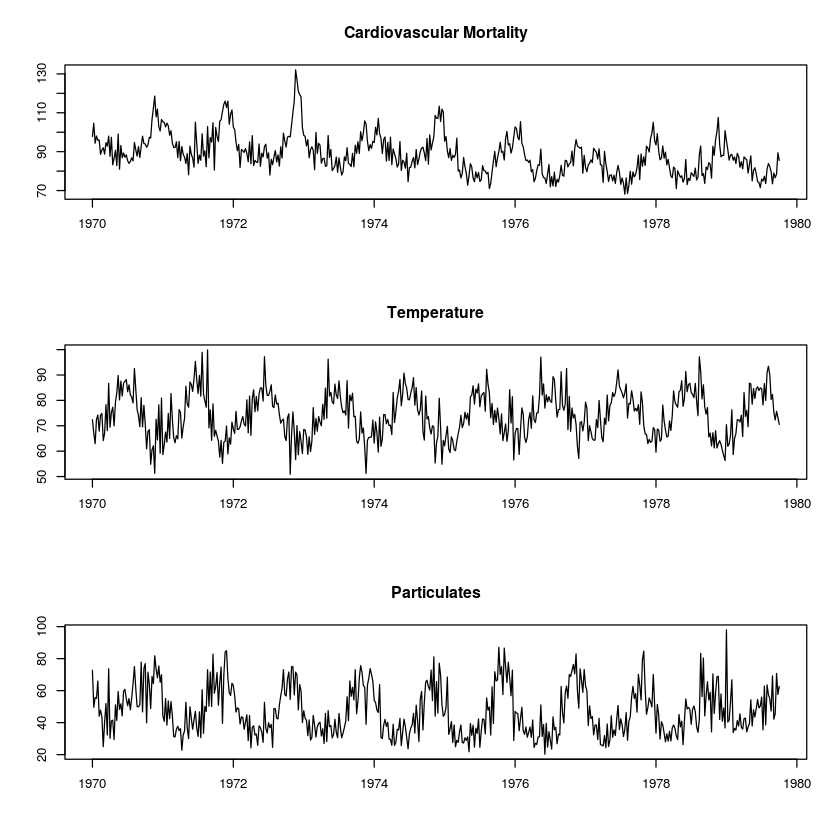


Call:
lm(formula = cmort ~ trend + temp + temp2 + part, na.action = NULL)

Residuals:
     Min       1Q   Median       3Q      Max 
-19.0760  -4.2153  -0.4878   3.7435  29.2448 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.831e+03  1.996e+02   14.19  < 2e-16 ***
trend       -1.396e+00  1.010e-01  -13.82  < 2e-16 ***
temp        -4.725e-01  3.162e-02  -14.94  < 2e-16 ***
temp2        2.259e-02  2.827e-03    7.99 9.26e-15 ***
part         2.554e-01  1.886e-02   13.54  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.385 on 503 degrees of freedom
Multiple R-squared:  0.5954,	Adjusted R-squared:  0.5922 
F-statistic:   185 on 4 and 503 DF,  p-value: < 2.2e-16


             Df Sum Sq Mean Sq F value Pr(>F)    
trend         1  10667   10667  261.62 <2e-16 ***
temp          1   8607    8607  211.09 <2e-16 ***
temp2         1   3429    3429   84.09 <2e-16 ***
part          1   7476    7476  183.36 <2e-16 ***
Residuals   503  20508      41                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                                 Df Sum Sq Mean Sq F value Pr(>F)    
cbind(trend, temp, temp2, part)   4  30178    7545     185 <2e-16 ***
Residuals                       503  20508      41                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

[1] 4.721732

[1] 4.771699

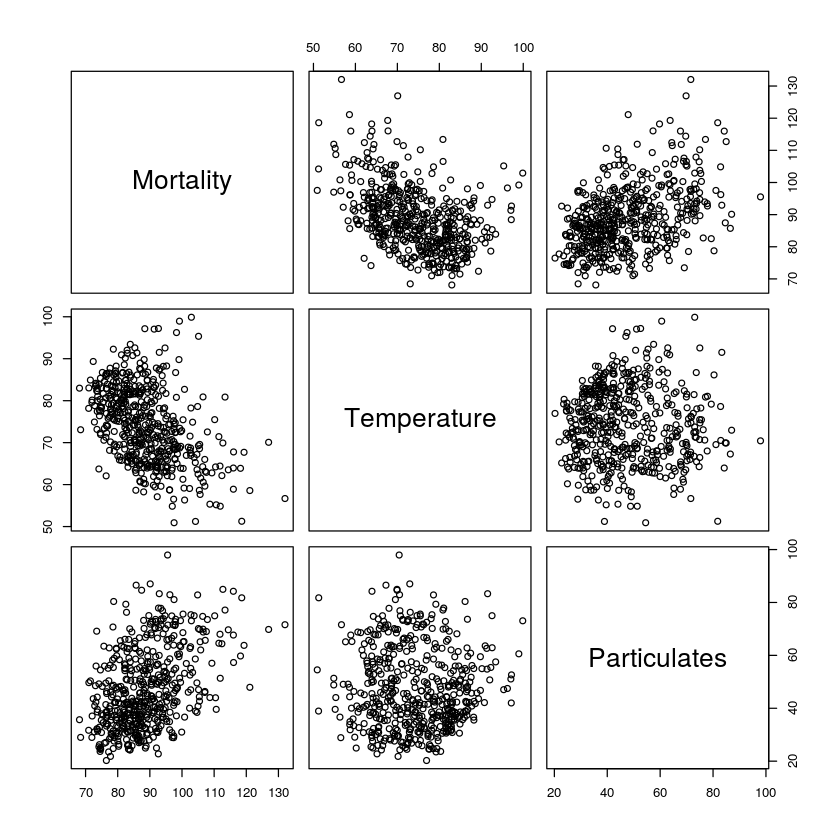

In [8]:
# plot data
par(mfrow = c(3, 1))
plot(cmort, main = "Cardiovascular Mortality", xlab = "", ylab = "")
plot(tempr, main = "Temperature", xlab = "", ylab = "")
plot(part, main = "Particulates", xlab = "", ylab = "")

# plot scattermatrix
pairs(cbind(Mortality = cmort, Temperature = tempr, Particulates = part))

# center and square the data
temp = tempr - mean(tempr)
temp2 = temp^2

# create time variable
trend = time(cmort)

# perform regression
fit = lm(cmort ~ trend + temp + temp2 + part, na.action  = NULL)
summary(fit)
summary(aov(fit))
summary(aov(lm(cmort ~ cbind(trend, temp, temp2, part))))

# get fit criteria
num = length(cmort)
AIC(fit)/num - log(2*pi) # AIC
AIC(fit, k = log(num))/num - log(2*pi) # BIC
AICc = log(sum(resid(fit)^2)/num) + (num + 5)/(num - 5 - 2) # AICc